# Proyecto 4

## Ecuaciones diferenciales de segundo orden. Sistemas de dos ecuaciones diferenciales

Los métodos numéricos que hemos estudiado para resolver problemas de valor inicial se pueden extender muy fácilmente para sistemas de ecuaciones diferenciales (de primer orden). 

Esto, además, nos permitirá resolver ecuaciones diferenciales de orden superior, pues toda ecuación diferencial de orden $n$ se puede reescribir como un sistema de $n$ ecuaciones diferenciales de primer orden. 

La idea de esta práctica es:

1.- Elegir algún problema de valor inicial que se considere interesante (por ejemplo, extraído de la bibliografía de esta u otras asignaturas, ecuaciones que provengan del ámbito de la Ciencia, etc.) y que vengan dados como sistema de dos (o más) ecuaciones diferenciales o bien como una ecuación diferencial de orden 2. 

2.- Resolver este sistema de ecuaciones diferenciales usando alguno de los métodos numéricos que hemos estudiado en esta asignatura (que deberá ser adaptado convenientemente, como en el ejemplo que aparece a continuación, en el que se usa el método de Euler).

3.- Comparar con distintos valores de $h$ y con alguno (o algunos) de los siguientes:

  * a) Con la solución exacta (en caso de que ésta sea conocida)
  * b) Con el método de Euler (que aparece más abajo) y/o con otros métodos de orden superior
  * c) Con la solución aproximada que proporciona la función *odeint* de Python. 

### Un ejemplo: ecuación diferencial de orden 2 proveniente de la Física

Como ejemplo de un problema que es abordable mediante las técnicas que hemos estudiado, se introducen a continuación las ecuaciones que describen la variación con el tiempo en la posición de una partícula sujeta un muelle (suponiendo que el amortiguamiento es igual al cubo de la velocidad):
> \begin{align*}
    &y'' + 2 (y')^3 + y = 0, \quad t\in [a,b], \\
    &y(a) = y_a,\\
    &y'(a)= z_a,\\
  \end{align*}
  
donde $y_a$ y $z_a$ son datos conocidos. Por ejemplo, $y_a=1$ y $z_a=0$, en cuyo caso estamos suponiendo que en el instante inicial hemos seprado la partícula una unidad de su posición de equilibrio y la hemos soltado sin imprimirle una velocidad inicial.

### Ejemplo: El método de euler para sistemas de 2 ecuaciones diferenciales

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def f(t, y, z): return z
def g(t, y, z): return -2*z**3 -y

In [3]:
def euler_sistemas(f, g, y0, z0, a, b, N):
    "Método de euler para sistemas de 2 ecuaciones diferenciales"
    # Inicializar datos
    h = float(b-a)/N
    t = linspace(a, b, N+1)
    y = zeros(N+1)
    z = zeros(N+1)
    
    # Método de Euler
    y[0] = y0
    z[0] = z0
    for k in range(N):
        y[k+1] = y[k] + h*f(t[k], y[k], z[k])
        z[k+1] = z[k] + h*g(t[k], y[k], z[k])
    return t, y, z

In [4]:
a, b = 0, 20
y0 = 1; z0 = 0;  # Valores iniciales
N = 100
t, y, z = euler_sistemas(f, g, y0, z0, a, b, N)

Dibujamos las dos funciones, $y(t)$ y $z(t)$ que definen la solución del problema de valor inicial

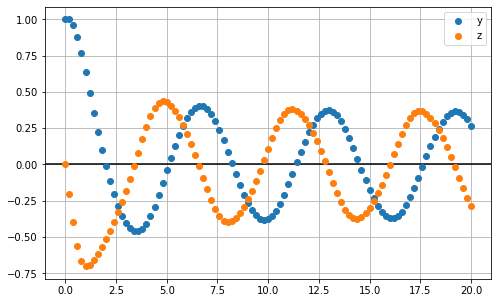

In [5]:
rcParams['figure.figsize'] = (8, 5) # Tamaño de la gráfica
axhline(c='k') # Eje X, color "blacK"
plot(t, y, "o", label="y")
plot(t, z, "o", label="z")
legend()
grid()

Dibujamos la solución, pero interpretando $y$ como abscisa y $z$ como ordenadas de una curva paramétrica $(y(t),z(t))$

Text(-0.2343279241338585, -0.037196924729218594, 'Instante final, $k=100$')

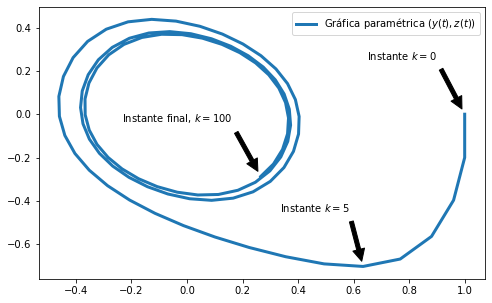

In [6]:
# Pintar gráfica
plot(y, z, lw=3, label=u"Gráfica paramétrica $(y(t),z(t))$")
legend()

# Pintar flechas
annotate('Instante $k=0$',
                xy=(y0, z0),  # Posición a la que apunta la flecha
                xytext=(y0-0.35, z0+0.25), # Posición en la que escribir el texto
                arrowprops = dict(facecolor='black', shrink=0.1) # Propiedades de la flecha (shrink=alejarla de la gráfica)  
                )  

annotate('Instante $k=5$',
                xy=(y[5], z[5]),  # Posición a la que apunta la flecha
                xytext=(y[5]-0.3, z[5]+0.25), # Posición en la que escribir el texto
                arrowprops = dict(facecolor='black', shrink=0.1)   )  # Propiedades de la flecha

annotate('Instante final, $k=%i$' % (N),
                xy=(y[N], z[N]),  # Posición a la que apunta la flecha
                xytext=(y[N]-0.5, z[N]+0.25), # Posición en la que escribir el texto
                arrowprops = dict(facecolor='black', shrink=0.1)   )  # Propiedades de la flecha